# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
181,2023-10-13,20,18,15,83.333333,16.666667,150.4095,medium,2023-10-13
182,2023-10-14,19,19,18,94.736842,5.263158,124.5070,medium,2023-10-14
183,2023-10-15,18,17,14,82.352941,17.647059,150.4310,medium,2023-10-15
184,2023-10-16,17,16,15,93.750000,6.250000,61.2455,easy,2023-10-16


How many people are playing Reflect?

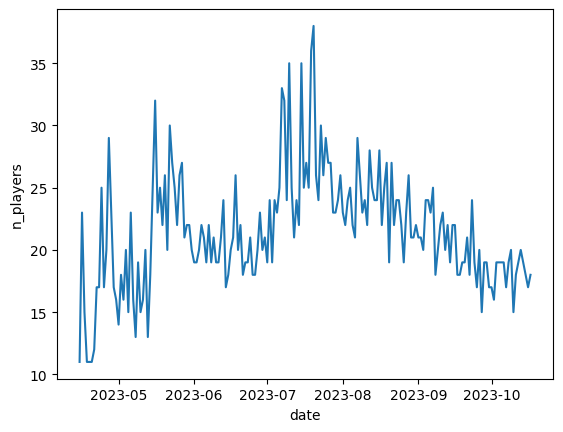

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

403

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2023-10-13,20,18,15,83.333333,16.666667,150.4095,medium,2023-10-13,puzzle-2023-10-13.txt,...,5.400000,10,27,6,0,2,1,8,4,115.3
182,2023-10-14,19,19,18,94.736842,5.263158,124.5070,medium,2023-10-14,puzzle-2023-10-14.txt,...,4.333333,7,26,0,0,2,1,10,4,41.2
183,2023-10-15,18,17,14,82.352941,17.647059,150.4310,medium,2023-10-15,puzzle-2023-10-15.txt,...,3.500000,8,28,0,0,2,1,10,4,41.5
184,2023-10-16,17,16,15,93.750000,6.250000,61.2455,easy,2023-10-16,puzzle-2023-10-16.txt,...,4.500000,8,27,0,0,2,1,9,4,155.9


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

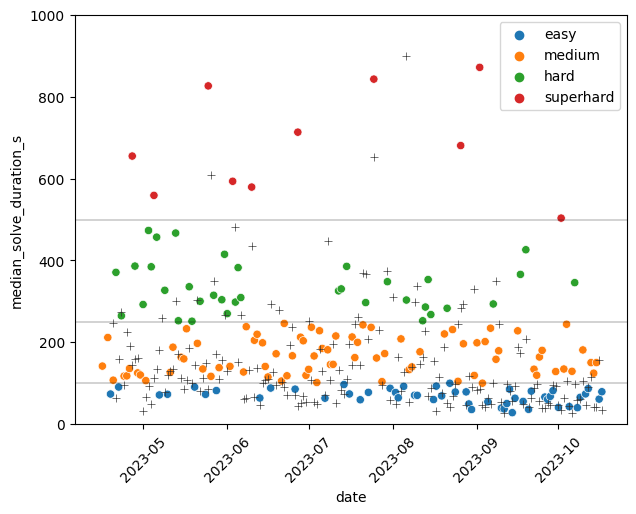

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

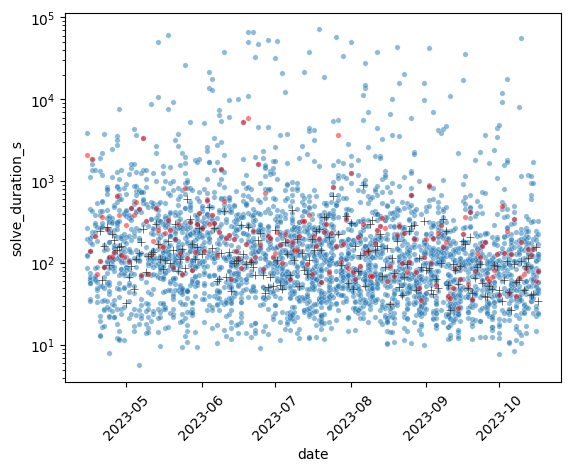

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

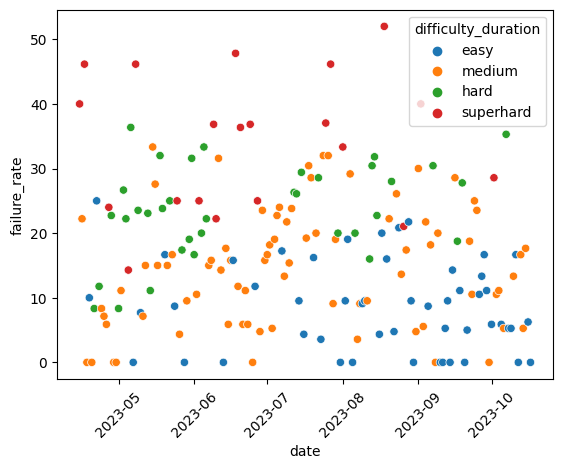

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.546547,0.075668,0.061224,0.120448,0.072636,-0.020269,0.123035,0.016431,0.088481,0.086724,0.095431,-0.029299,0.096055,0.200242,0.171205,0.189473,0.158608
failure_rate,0.546547,1.000000,0.110969,0.051295,0.080325,0.065848,0.030841,0.195555,0.002449,0.054259,0.095871,0.027662,-0.038952,0.177134,0.127792,0.266619,0.200389,0.157793
total_beam_distance,0.200242,0.127792,0.153081,0.103278,0.465051,0.330718,-0.225296,0.158639,0.054724,0.299993,-0.050534,0.425597,0.112264,0.344711,1.000000,0.313458,0.127047,0.023410
excess_reflections,0.189473,0.200389,0.324580,-0.454155,-0.318377,0.600912,0.517122,0.548125,-0.144641,-0.153058,-0.288900,0.356665,0.389144,0.197902,0.127047,0.164609,1.000000,0.783200
excess_beam_distance,0.171205,0.266619,-0.153099,-0.292217,-0.171827,0.260705,0.073493,0.263356,-0.174788,-0.040983,-0.310476,0.312067,0.370289,0.704929,0.313458,1.000000,0.164609,0.061148
num_excess_reflection_beams,0.158608,0.157793,0.251263,-0.233106,-0.206448,0.405505,0.457208,0.202678,0.033198,0.005204,-0.014463,0.241808,0.183439,0.016472,0.023410,0.061148,0.783200,1.000000
max_blocks_per_beam,0.123035,0.195555,0.151737,-0.321651,-0.152475,0.477419,0.343937,1.000000,-0.263307,0.021643,-0.151033,0.372204,0.231765,0.316817,0.158639,0.263356,0.548125,0.202678
num_beams,0.120448,0.080325,-0.035854,0.819024,1.000000,-0.227648,-0.595407,-0.152475,0.171164,0.784903,0.617691,0.164802,-0.801168,-0.192432,0.465051,-0.171827,-0.318377,-0.206448
max_beam_distance,0.096055,0.177134,-0.083267,-0.274695,-0.192432,0.187932,0.002194,0.316817,-0.252820,-0.172403,-0.348460,0.188486,0.413835,1.000000,0.344711,0.704929,0.197902,0.016472
num_double_reflect_blocks,0.095431,0.027662,0.126456,-0.065563,0.164802,0.732568,0.298810,0.372204,0.281285,0.409123,-0.299824,1.000000,0.020227,0.188486,0.425597,0.312067,0.356665,0.241808


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

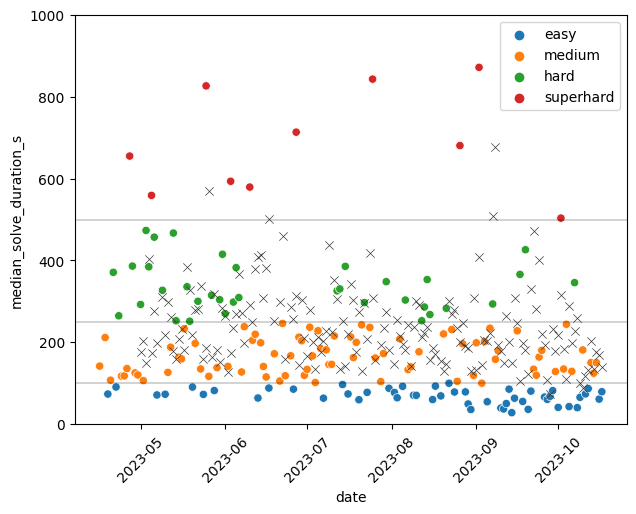

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');